<a href="https://colab.research.google.com/github/SidharthArya/Deep_Learning_Class_Manit/blob/main/Lab/008-Human-Activity-Recognition-Smart-Phone-Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import SimpleRNN
from keras.layers import GRU
from keras.layers import TimeDistributed
from keras.layers import ConvLSTM2D
from keras.utils import to_categorical
from matplotlib import pyplot

In [4]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip

--2021-04-01 08:26:15--  https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60999314 (58M) [application/x-httpd-php]
Saving to: ‘UCI HAR Dataset.zip’

UCI HAR Dataset.zip 100%[===================>]  58.17M  16.6MB/s    in 3.5s    

2021-04-01 08:26:20 (16.6 MB/s) - ‘UCI HAR Dataset.zip’ saved [60999314/60999314]



In [6]:
!unzip "UCI HAR Dataset.zip" 

Archive:  UCI HAR Dataset.zip
   creating: UCI HAR Dataset/
  inflating: UCI HAR Dataset/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/UCI HAR Dataset/
  inflating: __MACOSX/UCI HAR Dataset/._.DS_Store  
  inflating: UCI HAR Dataset/activity_labels.txt  
  inflating: __MACOSX/UCI HAR Dataset/._activity_labels.txt  
  inflating: UCI HAR Dataset/features.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features.txt  
  inflating: UCI HAR Dataset/features_info.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features_info.txt  
  inflating: UCI HAR Dataset/README.txt  
  inflating: __MACOSX/UCI HAR Dataset/._README.txt  
   creating: UCI HAR Dataset/test/
   creating: UCI HAR Dataset/test/Inertial Signals/
  inflating: UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt  
   creating: __MACOSX/UCI HAR Dataset/test/
   creating: __MACOSX/UCI HAR Dataset/test/Inertial Signals/
  inflating: __MACOSX/UCI HAR Dataset/test/Inertial Signals/._body_acc_x_test.txt  
  inflating: UCI HAR

In [8]:
!mv "UCI HAR Dataset" HARDataset/

In [9]:

 
# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values
 
# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded
 
# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
	filepath = prefix + group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y
 
# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
	# load all train
	trainX, trainy = load_dataset_group('train', prefix + 'HARDataset/')
	print(trainX.shape, trainy.shape)
	# load all test
	testX, testy = load_dataset_group('test', prefix + 'HARDataset/')
	print(testX.shape, testy.shape)
	# zero-offset class values
	trainy = trainy - 1
	testy = testy - 1
	# one hot encode y
	trainy = to_categorical(trainy)
	testy = to_categorical(testy)
	print(trainX.shape, trainy.shape, testX.shape, testy.shape)
	return trainX, trainy, testX, testy
 


(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)


KeyboardInterrupt: ignored

In [11]:
trainX, trainy, testX, testy = load_dataset()

(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)


In [31]:
trainy[0].shape, trainX[0].shape

((6,), (128, 9))

In [49]:
trainX.max(axis=1)

array([[ 1.024606e+00, -1.172102e-01,  1.094850e-01, ...,  5.054452e-02,
         7.485018e-02,  2.285864e-02],
       [ 1.024606e+00, -1.085598e-01,  1.057878e-01, ...,  5.524938e-02,
         1.685763e-02,  2.513287e-02],
       [ 1.027664e+00, -1.085598e-01,  1.057878e-01, ...,  5.524938e-02,
         7.611350e-04,  2.860941e-02],
       ...,
       [ 1.646699e+00,  7.093029e-02,  4.728184e-01, ...,  8.137940e-01,
         2.318530e+00,  7.888698e-01],
       [ 1.694786e+00,  5.127247e-02,  4.728184e-01, ...,  4.493282e-01,
         2.318530e+00,  7.888698e-01],
       [ 1.805013e+00,  5.127247e-02,  3.873746e-01, ...,  1.047599e+00,
         2.165013e+00,  6.735452e-01]])

In [72]:
epochs=50

# Models

## RNN

In [73]:
rnnmodel = Sequential([
                       SimpleRNN(128, input_shape=(trainX.shape[1:])),
                       Dense(64, activation='relu'),
                       Dense(trainy.shape[1], activation='sigmoid'),
])


In [74]:

rnnmodel.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])
              
rnnmodel.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_13 (SimpleRNN)    (None, 128)               17664     
_________________________________________________________________
dense_26 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_27 (Dense)             (None, 6)                 390       
Total params: 26,310
Trainable params: 26,310
Non-trainable params: 0
_________________________________________________________________


In [75]:
history=rnnmodel.fit(trainX, trainy, validation_split=0.2, shuffle=True, epochs=epochs, verbose=1)

Epoch 1/50
184/184 [==============================] - 8s 37ms/step - loss: 1.2016 - accuracy: 0.5080 - val_loss: 0.9205 - val_accuracy: 0.6628
Epoch 2/50
184/184 [==============================] - 6s 35ms/step - loss: 0.7374 - accuracy: 0.6886 - val_loss: 0.7820 - val_accuracy: 0.6914
Epoch 3/50
184/184 [==============================] - 6s 35ms/step - loss: 0.5654 - accuracy: 0.7623 - val_loss: 0.6926 - val_accuracy: 0.7743
Epoch 4/50
184/184 [==============================] - 6s 35ms/step - loss: 0.4707 - accuracy: 0.8205 - val_loss: 0.7586 - val_accuracy: 0.7396
Epoch 5/50
184/184 [==============================] - 6s 35ms/step - loss: 0.3712 - accuracy: 0.8676 - val_loss: 0.4330 - val_accuracy: 0.8572
Epoch 6/50
184/184 [==============================] - 6s 35ms/step - loss: 0.5789 - accuracy: 0.7802 - val_loss: 0.4509 - val_accuracy: 0.8266
Epoch 7/50
184/184 [==============================] - 6s 35ms/step - loss: 0.6686 - accuracy: 0.7461 - val_loss: 0.4721 - val_accuracy: 0.8124

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

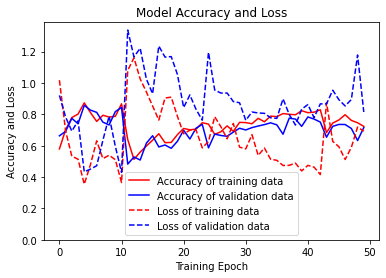

In [77]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

# Print confusion matrix for training data


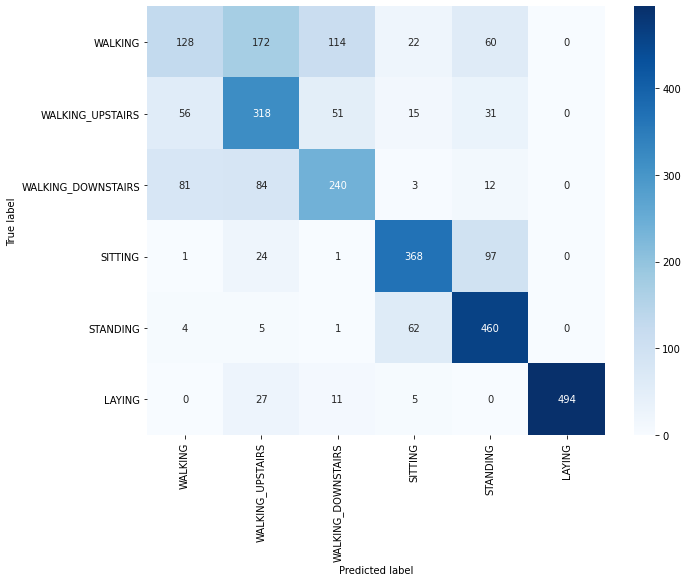

In [78]:
predictions = rnnmodel.predict(testX)

cm = tf.math.confusion_matrix(labels=tf.argmax(testy,1), predictions=tf.argmax(predictions,1))
axis_labels = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]
figure = plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,cmap=plt.cm.Blues,xticklabels=axis_labels, yticklabels=axis_labels, fmt='g')
plt.ylim(len(cm)-0, 0)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## GRU

In [82]:
grumodel = Sequential([
                       GRU(128, input_shape=(trainX.shape[1:])),
                       Dense(64, activation='relu'),
                       Dense(trainy.shape[1], activation='sigmoid'),
])


In [83]:

grumodel.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])
              
grumodel.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 128)               53376     
_________________________________________________________________
dense_30 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_31 (Dense)             (None, 6)                 390       
Total params: 62,022
Trainable params: 62,022
Non-trainable params: 0
_________________________________________________________________


In [84]:
epochs=20

In [85]:
history=grumodel.fit(trainX, trainy, validation_split=0.2, shuffle=True, epochs=epochs, verbose=1)

Epoch 1/20
184/184 [==============================] - 21s 101ms/step - loss: 1.2634 - accuracy: 0.4909 - val_loss: 0.8817 - val_accuracy: 0.7009
Epoch 2/20
184/184 [==============================] - 18s 98ms/step - loss: 0.6423 - accuracy: 0.7201 - val_loss: 0.6330 - val_accuracy: 0.7804
Epoch 3/20
184/184 [==============================] - 18s 98ms/step - loss: 0.3243 - accuracy: 0.8894 - val_loss: 0.4012 - val_accuracy: 0.8926
Epoch 4/20
184/184 [==============================] - 18s 97ms/step - loss: 0.1977 - accuracy: 0.9283 - val_loss: 0.3736 - val_accuracy: 0.8953
Epoch 5/20
184/184 [==============================] - 18s 98ms/step - loss: 0.1395 - accuracy: 0.9476 - val_loss: 0.3782 - val_accuracy: 0.8994
Epoch 6/20
184/184 [==============================] - 18s 98ms/step - loss: 0.1229 - accuracy: 0.9495 - val_loss: 0.3964 - val_accuracy: 0.9028
Epoch 7/20
184/184 [==============================] - 18s 98ms/step - loss: 0.1209 - accuracy: 0.9482 - val_loss: 0.3081 - val_accuracy

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

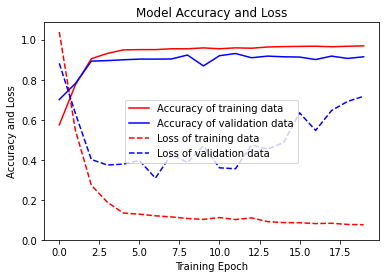

In [87]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

# Print confusion matrix for training data


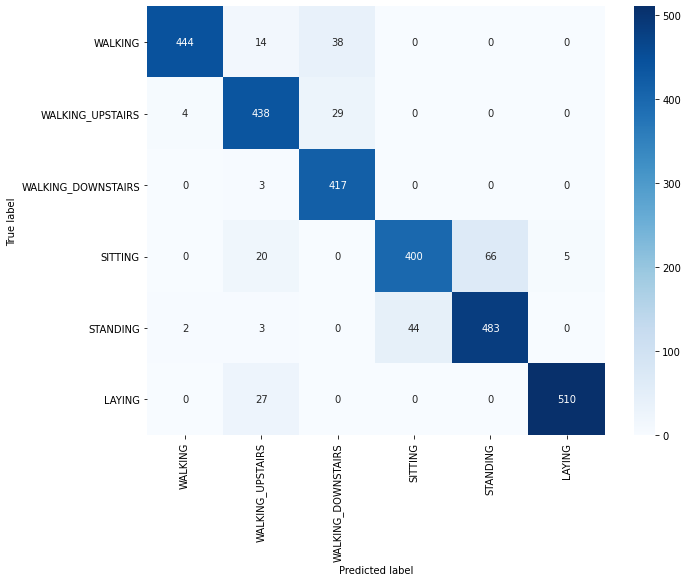

In [88]:
predictions = grumodel.predict(testX)

cm = tf.math.confusion_matrix(labels=tf.argmax(testy,1), predictions=tf.argmax(predictions,1))
axis_labels = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]
figure = plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,cmap=plt.cm.Blues,xticklabels=axis_labels, yticklabels=axis_labels, fmt='g')
plt.ylim(len(cm)-0, 0)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## LSTM

In [89]:
lstmmodel = Sequential([
                       LSTM(128, input_shape=(trainX.shape[1:])),
                       Dense(64, activation='relu'),
                       Dense(trainy.shape[1], activation='sigmoid'),
])


In [90]:

lstmmodel.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])
              
lstmmodel.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               70656     
_________________________________________________________________
dense_32 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_33 (Dense)             (None, 6)                 390       
Total params: 79,302
Trainable params: 79,302
Non-trainable params: 0
_________________________________________________________________


In [91]:
epochs=20

In [92]:
history=lstmmodel.fit(trainX, trainy, validation_split=0.2, shuffle=True, epochs=epochs, verbose=1)

Epoch 1/20
184/184 [==============================] - 25s 125ms/step - loss: 1.2502 - accuracy: 0.4773 - val_loss: 0.8430 - val_accuracy: 0.6540
Epoch 2/20
184/184 [==============================] - 22s 122ms/step - loss: 0.7297 - accuracy: 0.6993 - val_loss: 0.8411 - val_accuracy: 0.7539
Epoch 3/20
184/184 [==============================] - 22s 121ms/step - loss: 0.6219 - accuracy: 0.7569 - val_loss: 0.5517 - val_accuracy: 0.8266
Epoch 4/20
184/184 [==============================] - 22s 120ms/step - loss: 0.3166 - accuracy: 0.8866 - val_loss: 0.3977 - val_accuracy: 0.8953
Epoch 5/20
184/184 [==============================] - 22s 120ms/step - loss: 0.2015 - accuracy: 0.9238 - val_loss: 0.3705 - val_accuracy: 0.8838
Epoch 6/20
184/184 [==============================] - 22s 121ms/step - loss: 0.1585 - accuracy: 0.9463 - val_loss: 0.5039 - val_accuracy: 0.8661
Epoch 7/20
184/184 [==============================] - 22s 120ms/step - loss: 0.2725 - accuracy: 0.9025 - val_loss: 0.3801 - val_ac

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

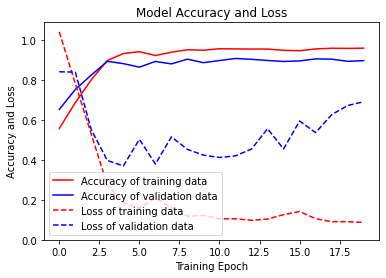

In [94]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

# Print confusion matrix for training data


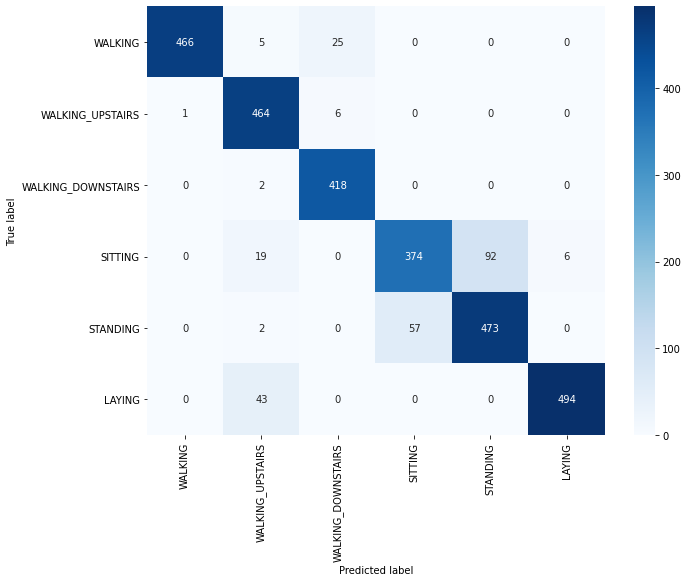

In [95]:
predictions = lstmmodel.predict(testX)

cm = tf.math.confusion_matrix(labels=tf.argmax(testy,1), predictions=tf.argmax(predictions,1))
axis_labels = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]
figure = plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,cmap=plt.cm.Blues,xticklabels=axis_labels, yticklabels=axis_labels, fmt='g')
plt.ylim(len(cm)-0, 0)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()